<a href="https://colab.research.google.com/github/twadhwa/ML_BASICS-/blob/main/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting our data ready ( Turning it into tensors  )

In [ ]:
# Checkout the labels of our data 
import pandas as pd 
label_csv = pd.read_csv("/content/drive/MyDrive/Dog Bread Data /labels.csv")
print(label_csv.describe())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     670ef01ee699aee16c762fe0a3fa23d0  scottish_deerhound
freq                                   1                 126


In [ ]:
label_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

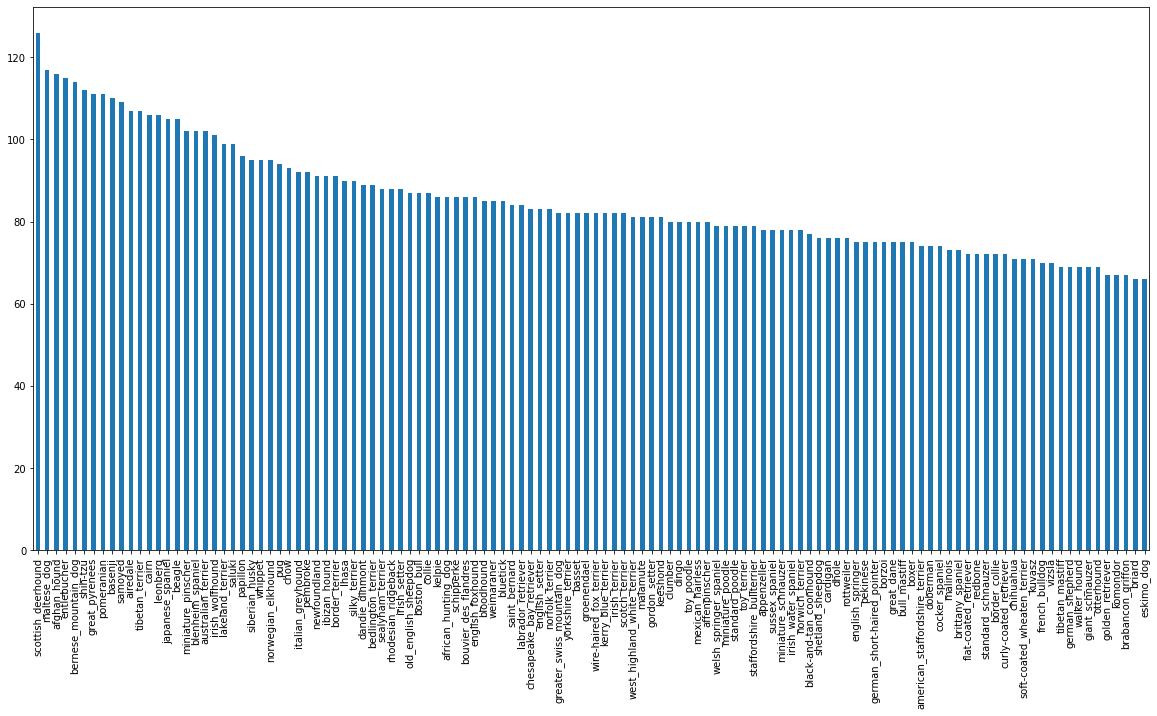

In [ ]:
label_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
label_csv["breed"].value_counts().mean()

85.18333333333334

In [ ]:
# Let's view images 
from IPython.display import Image

In [ ]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


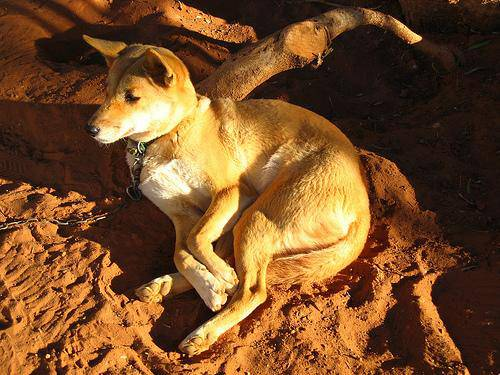

In [ ]:
Image("/content/drive/MyDrive/Dog Bread Data /train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels
Since we've got the image ID's and their labels in a DataFrame (labels_csv), we'll use it to create:

* A list a filepaths to training images
* An array of all labels
* An array of all unique labels

We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

In [ ]:
# Creating the pathnames from image id 

In [ ]:

# Create pathnames from image ID's
filenames = ["/content/drive/MyDrive/Dog Bread Data /train/" + fname + ".jpg" for fname in label_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['/content/drive/MyDrive/Dog Bread Data /train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/0042188c895a2f14ef64a918ed9c7b64.jpg']

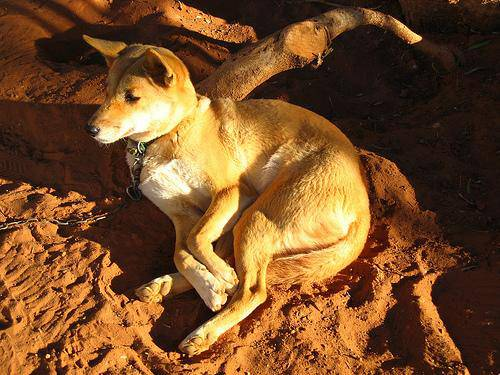

In [ ]:
Image("/content/drive/MyDrive/Dog Bread Data /train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

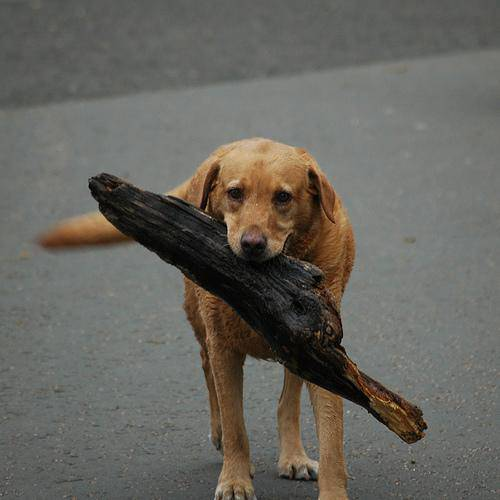

In [ ]:
Image(filenames[4])

In [ ]:
# Checking the amount of data 

# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Dog Bread Data /train")) == len(filenames):
      # Fucntion to count the number of files in the training data 
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


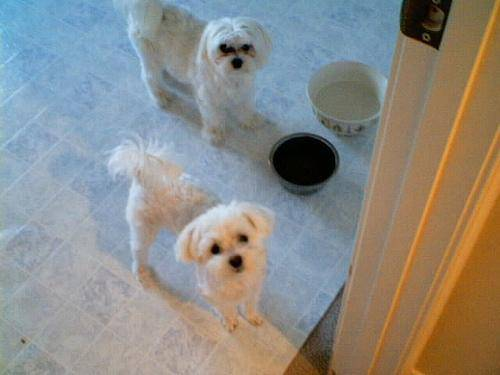

In [ ]:

Image(filenames[90])

In [ ]:
print(filenames[90])

/content/drive/MyDrive/Dog Bread Data /train/022b34fd8734b39995a9f38a4f3e7b6b.jpg


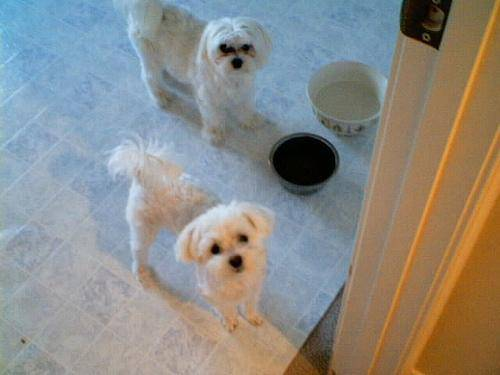

In [ ]:
Image("/content/drive/MyDrive/Dog Bread Data /train/022b34fd8734b39995a9f38a4f3e7b6b.jpg")

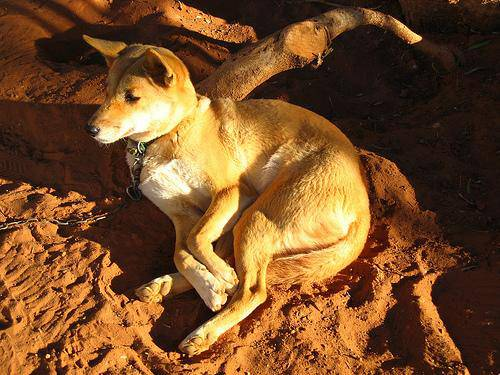

In [ ]:
Image("/content/drive/MyDrive/Dog Bread Data /train/001513dfcb2ffafc82cccf4d8bbaba97.jpg") 

In [ ]:
print(filenames[900])

/content/drive/MyDrive/Dog Bread Data /train/16052ac2a6ff7f1fbbc85885d2a7c467.jpg


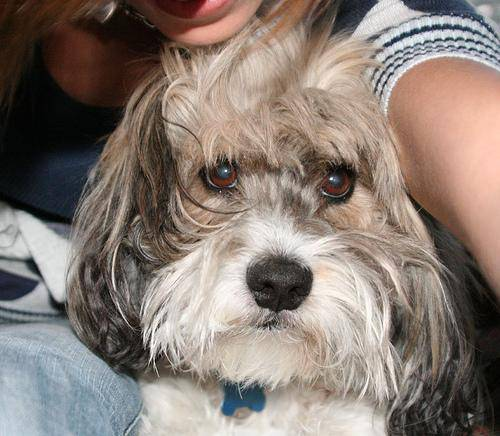

In [ ]:
Image("/content/drive/MyDrive/Dog Bread Data /train/16052ac2a6ff7f1fbbc85885d2a7c467.jpg")

In [ ]:
# Converting our labels into numpy arrays 
filenames

['/content/drive/MyDrive/Dog Bread Data /train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/004396df1acd0f1247b740ca2b14616e.jpg',
 '/content/drive/MyDrive/Dog Bread Data /train/0067dc3

In [ ]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
len(label_csv["breed"])

10222

In [ ]:
import numpy as np 
label = label_csv["breed"].to_numpy()
# Converting our breed to a numpy array label 
label[::10]

array(['boston_bull', 'shetland_sheepdog', 'doberman', ..., 'maltese_dog',
       'great_dane', 'miniature_pinscher'], dtype=object)

In [ ]:
if (len(label) == len(filenames)):
  print("We can start ")
else : 
  print("Data missing }")

We can start 


In [ ]:
# Finding unique elements in an array 

In [ ]:
unique_breeds = np.unique(label)

In [ ]:
len(unique_breeds) 


120

In [ ]:
# Turning each label into array of boolean
 
label[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
unique_breeds[19]

'boston_bull'

In [ ]:
# Creating an array of boolean 
boolean_label = [labels==unique_breeds for labels in label] 

In [ ]:
len(boolean_label)

10222

### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

We could use Scikit-Learn's train_test_split function or we could simply make manual splits of the data.

For accessibility later, let's save our filenames variable to X (data) and our labels to y.

In [ ]:
# Setting images use for as a variable 
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:5000}


In [ ]:
# Setting up variabls 
X = filenames 
y = boolean_label
len(X), len(y)

(10222, 10222)

In [ ]:
from sklearn.model_selection import train_test_split 

X_train , X_val , y_train , y_val = train_test_split (X[:NUM_IMAGES],
                                                        y[:NUM_IMAGES], 
                                                        test_size = 0.2, 
                                                        random_state = 42 )

In [ ]:
len(X_train) ,len(X_val ), len(y_train) , len(y_val)

(800, 200, 800, 200)

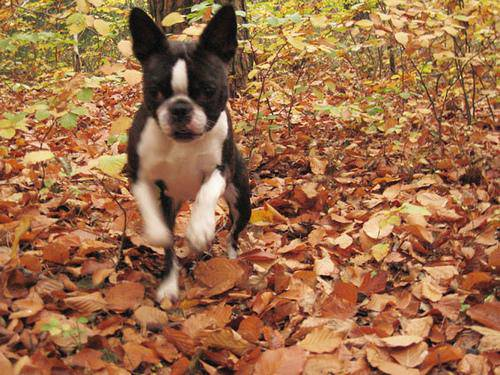

In [ ]:
Image(X[0])

In [ ]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

##Preprocessing images (turning images into Tensors)
Our labels are in numeric format but our images are still just file paths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors we're going to write a function which does a few things:

* Takes an image filename as input.
* Uses TensorFlow to read the file and save it to a variable, image.
* Turn our image (a jpeg file) into Tensors.
* Resize the image to be of shape (224, 224).
* Return the modified image.

A good place to read about this type of function is the TensorFlow documentation on loading images.

You might be wondering why (224, 224), which is (heigh, width). It's because this is the size of input our model (we'll see this soon) takes, an image which is (224, 224, 3).

What? Where's the 3 from? We're getting ahead of ourselves but that's the number of colour channels per pixel, red, green and blue.

Let's make this a little more concrete.

In [ ]:
from  matplotlib.pyplot import imread



image=imread(filenames[0])
image 


array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  80],
        [192, 140,  82]]

In [ ]:
import tensorflow as tf
image_2= tf.constant(image)


In [ ]:
image_2

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

### Creating data batches
Wonderful. Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow BatchDataset).

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of process_image function at the same time.



In [ ]:
# Function to convert data in tensors 
IMG_SIZE = 224 

# Creating a function that takes input as file location and give back output as
# tesnor 

def preprocessing_image (file_path):
  image = tf.io.read_file(file_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels= 0 )
  # Converting our image from numbers 0-255 to 0-1 
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image 

In [ ]:
# Create a simple function to return a tuple (image, label)
# We have to convert the label into the tuple afterward 

def get_image_label(image_path , label):
  image = preprocessing_image(image_path)
 

  return image ,label

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

    





In [ ]:
len(X_train), len(y_train)

(800, 800)

In [ ]:
# Checking the above function 
training_batch = create_data_batches(X_train, y_train)


Creating training data batches...


In [ ]:
training_batch.element_spec


(TensorSpec(shape=(None, 224, 224, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [ ]:
len(training_batch)

25

In [ ]:
len(training_batch)

25

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

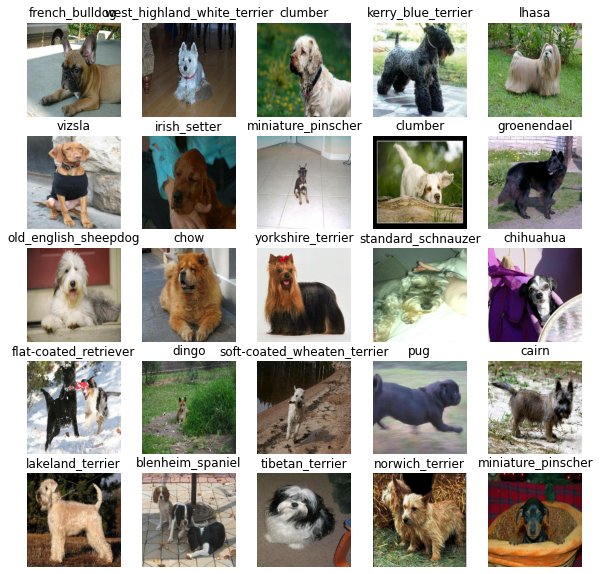

In [ ]:
train_images, train_labels = next(training_batch.as_numpy_iterator())
# We are calling the training data everytime therefore it is shuffling the data 
show_25_images(train_images,train_labels)

In [ ]:
validation_batch = create_data_batches(X_val, y_val, valid_data= True )

Creating validation data batches...


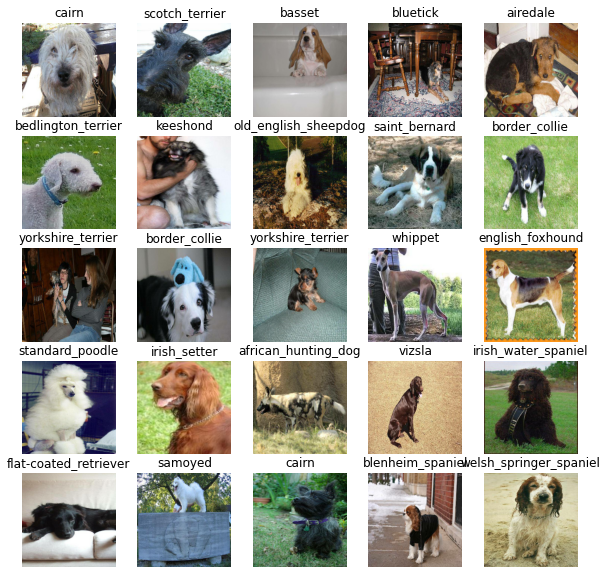

In [ ]:
val_images , val_labels = next(validation_batch.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Creating and training a model
Now our data is ready, let's prepare it modelling. We'll use an existing model from TensorFlow Hub.

TensorFlow Hub is a resource where you can find pretrained machine learning models for the problem you're working on.

Using a pretrained machine learning model is often referred to as transfer learning.

Why use a pretrained model?
Building a machine learning model and training it on lots from scratch can be expensive and time consuming.

Transfer learning helps eliviate some of these by taking what another model has learned and using that information with your own problem.

How do we choose a model?
Since we know our problem is image classification (classifying different dog breeds), we can navigate the TensorFlow Hub page by our problem domain (image).

We start by choosing the image problem domain, and then can filter it down by subdomains, in our case, image classification.

Doing this gives a list of different pretrained models we can apply to our task.

Clicking on one gives us information about the model as well as instructions for using it.

For example, clicking on the mobilenet_v2_130_224 model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.

Let's try it out.

Building a model
Before we build a model, there are a few things we need to define:

* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

These things will be standard practice with whatever machine learning model you use. And because we're using TensorFlow, everything will be in the form of Tensors.



In [ ]:
print(training_batch)

<BatchDataset shapes: ((None, 224, 224, None), (None, 120)), types: (tf.float32, tf.bool)>


In [ ]:
# Now we are setting the Input shape 
INP_SHAPE = [None, 224 , 224 , 3] # Batches , height , widht , Channel 

OUT_SHAPE = 120 

MODEL_URL  = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"



Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together

There are many ways of building a model in TensorFlow but one of the best ways to get started is to use the Keras API.

Defining a deep learning model in Keras can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"

Knowing this, let's create a function which:

* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

We'll take a look at the code first, then dicuss each part.

In [ ]:
# Creating a function that we take the input shape and the output shape as input and return the model 
import tensorflow as tf
import tensorflow_hub as hub
def create_model (input_shape = INP_SHAPE, output_shape = OUT_SHAPE , model = MODEL_URL):
  print("Building Model with : " ,MODEL_URL)
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    # This function takes the model Url as the input and find the pattern the data 
    tf.keras.layers.Dense(units=output_shape, 
                          activation="softmax") # Layer 2 (output layer)
    # This function is basically converting the patterns in our data to output shape 
    # The softmax is creates all the data between 0 and 1 
  ])

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are). The less the value of loss the better the model is ........
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(input_shape) # Let the model know what kind of inputs it'll be getting
  
  return model

# What's happening here?

Setting up the model layers
There are two ways to do this in Keras, the functional and sequential API. We've used the sequential.

Which one should you use?

The Keras documentation states the functional API is the way to go for defining complex models but the sequential API (a linear stack of layers) is perfectly fine for getting started, which is what we're doing.

The first layer we use is the model from TensorFlow Hub (hub.KerasLayer(MODEL_URL). So our first layer is actually an entire model (many more layers). This input layer takes in our images and finds patterns in them based on the patterns mobilenet_v2_130_224 has found.

The next layer (tf.keras.layers.Dense()) is the output layer of our model. It brings all of the information discovered in the input layer together and outputs it in the shape we're after, 120 (the number of unique labels we have).

The activation="softmax" parameter tells the output layer, we'd like to assign a probability value to each of the 120 labels somewhere between 0 & 1. The higher the value, the more the model believes the input image should have that label. If we were working on a binary classification problem, we'd use activation="sigmoid".

For more on which activation function to use, see the article Which Loss and Activation Functions Should I Use?

Compiling the model
This one is best explained with a story.

Let's say you're at the international hill descending championships. Where your start standing on top of a hill and your goal is to get to the bottom of the hill. The catch is you're blindfolded.

Luckily, your friend Adam is standing at the bottom of the hill shouting instructions on how to get down.

At the bottom of the hill there's a judge evaluating how you're doing. They know where you need to end up so they compare how you're doing to where you're supposed to be. Their comparison is how you get scored.

Transferring this to model.compile() terminology:

loss - The height of the hill is the loss function, the models goal is to minimize this, getting to 0 (the bottom of the hill) means the model is learning perfectly.
optimizer - Your friend Adam is the optimizer, he's the one telling you how to navigate the hill (lower the loss function) based on what you've done so far. His name is Adam because the Adam optimizer is a great general which performs well on most models. Other optimizers include RMSprop and Stochastic Gradient Descent.
metrics - This is the onlooker at the bottom of the hill rating how well your perfomance is. Or in our case, giving the accuracy of how well our model is predicting the correct image label.
Building the model
We use model.build() whenever we're using a layer from TensorFlow Hub to tell our model what input shape it can expect.

In this case, the input shape is [None, IMG_SIZE, IMG_SIZE, 3] or [None, 224, 224, 3] or [batch_size, img_height, img_width, color_channels].

Batch size is left as None as this is inferred from the data we pass the model. In our case, it'll be 32 since that's what we've set up our data batches as.

Now we've gone through each section of the function, let's use it to create a model.

We can call summary() on our model to get idea of what our model looks like.

In [ ]:

model = create_model()
model.summary()

Building Model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_2 (Dense)              (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


The non-trainable parameters are the patterns learned by mobilenet_v2_130_224 and the trainable parameters are the ones in the dense layer we added.

This means the main bulk of the information in our model has already been learned and we're going to take that and adapt it to our own problem.

Creating callbacks
We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

TensorBoard Callback
TensorBoard helps provide a visual way to monitor the progress of your model during and after training.

It can be used directly in a notebook to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

Load the TensorBoard notebook extension.
Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
Visualize the our models training logs using the %tensorboard magic function (we'll do this later on).

In [ ]:
# Loading the tensorboard magic function in our collab notebook 
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime 

In [ ]:
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

# Early Stopping Callback
Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

Training a model (on a subset of data)
Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

The final parameter we'll define before training is NUM_EPOCHS (also known as number of epochs).

NUM_EPOCHS defines how many passes of the data we'd like our model to do. A pass is equivalent to our model trying to find patterns in each dog image and see which patterns relate to each label.

If NUM_EPOCHS=1, the model will only look at the data once and will probably score badly because it hasn't a chance to correct itself. It would be like you competing in the international hill descent championships and your friend Adam only being able to give you 1 single instruction to get down the hill.

What's a good value for NUM_EPOCHS?

This one is hard to say. 10 could be a good start but so could 100. This is one of the reasons we created an early stopping callback. Having early stopping setup means if we set NUM_EPOCHS to 100 but our model stops improving after 22 epochs, it'll stop training.

Along with this, let's quickly check if we're still using a GPU.

In [ ]:
NUM_EPOC = 25 #@param{type : "slider" , min:10 , max:100 , step:10}
# EPOCS is the number of time our model is allowed to look at the training data 

In [ ]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


Boom! We've got a GPU running and NUM_EPOCHS setup. Let's create a simple function which trains a model. The function will:

Create a model using create_model().
Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
Return the fitted model.

In [ ]:
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=training_batch,
            epochs=NUM_EPOC,
            validation_data=validation_batch,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [ ]:

# Fit the model to the data
model = train_model()



Building Model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/25
25/25 [==============================] - 9s 229ms/step - loss: 5.0919 - accuracy: 0.0572 - val_loss: 3.5049 - val_accuracy: 0.2500
Epoch 2/25
25/25 [==============================] - 4s 160ms/step - loss: 1.9949 - accuracy: 0.6295 - val_loss: 2.2257 - val_accuracy: 0.4950
Epoch 3/25
25/25 [==============================] - 4s 161ms/step - loss: 0.6514 - accuracy: 0.9172 - val_loss: 1.7511 - val_accuracy: 0.5850
Epoch 4/25
25/25 [==============================] - 4s 161ms/step - loss: 0.2690 - accuracy: 0.9906 - val_loss: 1.5555 - val_accuracy: 0.6150
Epoch 5/25
25/25 [==============================] - 4s 160ms/step - loss: 0.1508 - accuracy: 0.9993 - val_loss: 1.4575 - val_accuracy: 0.6300
Epoch 6/25
25/25 [==============================] - 4s 156ms/step - loss: 0.1050 - accuracy: 1.0000 - val_loss: 1.3965 - val_accuracy: 0.6550
Epoch 7/25
25/25 [==============================] - 4

Question: It looks like our model might be overfitting (getting far better results on the training set than the validation set), what are some ways to prevent model overfitting? Hint: this may involve searching something like "ways to prevent overfitting in a deep learning model?".

Note: Overfitting to begin with is a good thing. It means our model is learning something.

Checking the TensorBoard logs
Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.

The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and viualize its contents.

So as you can see the model training stop at the 17 epoc because of the early stopping API that we used our model 

In [ ]:
prediction = model.predict(validation_batch, verbose = 1
                           )

7/7 [==============================] - 1s 109ms/step


In [ ]:
prediction 

array([[9.4800995e-04, 3.5610519e-05, 8.9517963e-04, ..., 8.7730662e-04,
        1.4175259e-04, 8.5752411e-03],
       [7.9228450e-03, 2.4049231e-03, 1.2255771e-02, ..., 2.2548013e-03,
        1.5090706e-03, 1.9571521e-04],
       [1.4033518e-04, 1.9802968e-03, 3.2289667e-04, ..., 3.3111902e-04,
        1.6378814e-04, 3.1909507e-03],
       ...,
       [2.1577002e-06, 4.8682919e-05, 2.7722178e-04, ..., 6.9552111e-06,
        1.3897111e-04, 1.1050280e-04],
       [1.3772958e-02, 7.1398055e-05, 1.1668619e-04, ..., 2.2904482e-04,
        5.5781253e-05, 1.8587707e-02],
       [2.0913749e-05, 1.0542402e-05, 1.1679308e-03, ..., 5.2884320e-04,
        4.2539768e-04, 1.8606245e-04]], dtype=float32)

In [ ]:
# First prediction


print("The postion of the number is " ,np.where(np.max(prediction)))


#print(f"Max value (probability of prediction): {np.max(prediction[0])}") # the max probability value predicted by the model
#print(f"Sum: {np.sum(prediction[0])}") # because we used softmax activation in our model, this will be close to 1
#print(f"Max index: {np.argmax(prediction[0])}") # the index of where the max value in predictions[0] occurs
#print(f"Predicted label: {unique_breeds[np.argmax(prediction[0])]}") # the predicted label



The postion of the number is  (array([0]),)


In [ ]:
prediction[0]

array([9.48009954e-04, 3.56105193e-05, 8.95179634e-04, 3.20913859e-05,
       1.27638370e-04, 1.81325140e-05, 3.66590582e-02, 5.30147809e-04,
       2.62982998e-04, 7.34715781e-04, 6.39110629e-04, 4.06110921e-04,
       1.52113568e-03, 1.59591087e-04, 7.60655617e-04, 1.56269583e-03,
       3.27013404e-04, 1.93462223e-01, 1.05205734e-04, 5.99419072e-05,
       1.46715116e-04, 9.84505605e-05, 3.08835952e-05, 1.20680465e-03,
       8.95179619e-06, 1.10359339e-04, 2.92261183e-01, 3.95165232e-04,
       1.00563373e-03, 2.05263670e-04, 1.98998343e-04, 1.42115215e-03,
       3.83964740e-04, 7.46705773e-05, 4.86856006e-05, 2.01462880e-02,
       9.97491406e-06, 2.05086847e-03, 1.15609670e-04, 1.37169933e-04,
       2.79158284e-03, 4.86548270e-05, 1.05719380e-04, 3.84104460e-05,
       2.24866199e-05, 1.28172949e-04, 1.13049500e-04, 1.12453650e-03,
       2.11243262e-03, 9.36174401e-05, 8.04381925e-05, 3.60669328e-05,
       1.41941695e-04, 5.78502149e-05, 3.93323135e-04, 3.64609114e-05,
      

In [ ]:
x = np.arange(1,121,1)
y = prediction[112]

In [ ]:
print(x)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120]


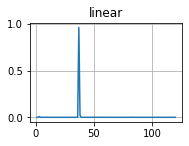

In [ ]:

plt.subplot(221)
plt.plot(x, y)

plt.title('linear')
plt.grid(True)

In [ ]:
# Turning the prediction probabilities into labels 
def get_image_label(prediction_probabilities):
  label =np.argmax(prediction_probabilities)
  return unique_breeds[label]

print(get_image_label(prediction[12]))

yorkshire_terrier


In [ ]:
validation_batch

<BatchDataset shapes: ((None, 224, 224, None), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(validation_batch)
val_images[0], val_labels[0]
    

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278


Nailed it!

Now we've got ways to get:

*  Prediction labels
* Validation labels (truth labels)
* Validation images
Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:

* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_image_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

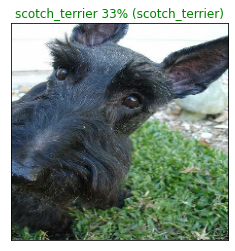

In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=prediction,
          labels=val_labels,
          images=val_images)


Nice! Making functions to help visual your models results are really helpful in understanding how your model is doing.

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Let's build a function to demonstrate. The function will:

* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using get_pred_label().
* Find the top 10:
    * 1) Prediction probabilities indexes
    * 2) Prediction probabilities values
    * 3) Prediction labels
Plot the top 10 prediction probability values and labels, coloring the true label green.

In [ ]:
prediction[10]

array([4.31087683e-04, 1.41227201e-01, 8.34231672e-04, 2.04063163e-05,
       5.94765952e-05, 5.31135015e-07, 2.98850168e-03, 5.06524928e-04,
       3.80259997e-04, 1.80366472e-03, 1.78089958e-05, 1.21150715e-02,
       5.65666232e-06, 1.26560364e-04, 6.55986296e-05, 2.38040393e-05,
       8.39383356e-05, 1.14191300e-03, 1.08135537e-05, 2.19583017e-04,
       1.47541403e-04, 1.34959802e-04, 1.61193111e-05, 6.81654783e-05,
       3.27104608e-05, 6.61931190e-05, 2.15516906e-04, 4.47782113e-05,
       8.94216209e-05, 4.76308167e-03, 3.15266402e-06, 7.29070371e-06,
       1.46075943e-03, 8.22462389e-05, 4.56856869e-05, 3.12289759e-03,
       4.01565018e-07, 2.06381674e-06, 5.65680239e-06, 1.55357411e-05,
       1.20441306e-04, 3.05752337e-06, 3.65611481e-06, 8.31946238e-07,
       3.65702522e-06, 7.91286311e-07, 4.29709553e-06, 1.11930701e-03,
       8.22750226e-05, 7.52087653e-05, 1.16275842e-04, 6.47568595e-06,
       8.51061137e-04, 2.06068957e-08, 5.75785862e-06, 3.98318616e-06,
      

In [ ]:
np.argsort(prediction[0])

array([ 24,  36,  99,   5,  61,  44, 112,  84,  56,  22,   3, 115,   1,
        51,  55,  43,  75,  41,  34,  67, 108,  53,  19,  69,  33,  50,
        49,  63,  21,  18,  42,  25,  46,  38, 107,   4,  45,  95,  39,
       101, 118,  52,  20,  13,  86, 111,  94, 113,  78,  30,  92,  29,
        66,  62,  82,  71,   8,  98, 110,  16,  88,  87,  32,  54,  27,
        11, 104,  60,  85,   7,  72, 105,  10, 114,   9,  14, 117,   2,
        80,   0,  58,  28,  47,  23,  91,  93,  74,  31,  96,  12,  15,
        89,  37,  48,  97,  40,  64,  57,  76, 116,  81,  90, 119,  77,
        83, 106,  65, 100,  35,  73,  68,  59, 102,  79,   6, 103, 109,
        70,  17,  26])

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_image_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

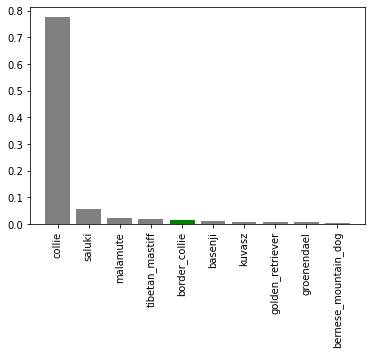

In [ ]:
plot_pred_conf(prediction_probabilities= prediction,
               labels=val_labels,
               n=9)

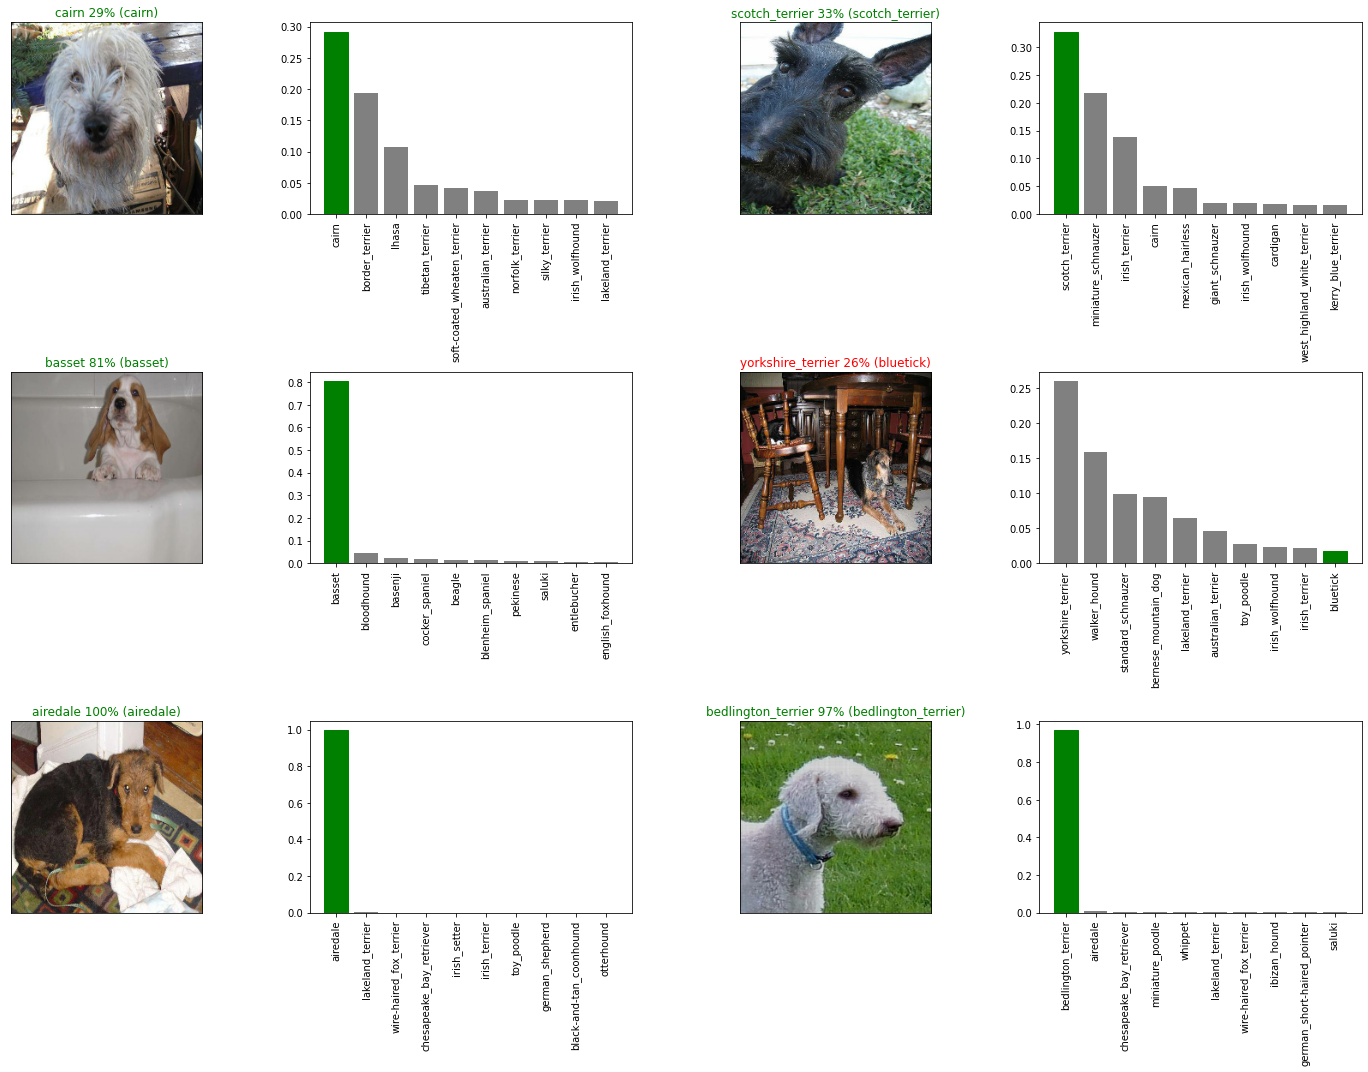

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=prediction,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=prediction,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

Saving and reloading a model
After training a model, it's a good idea to save it. Saving it means you can share it with colleagues, put it in an application and more importantly, won't have to go through the potentially expensive step of retraining it.

The format of an entire saved Keras model is h5. So we'll make a function which can take a model as input and utilise the save() method to save it as a h5 file to a specified directory.

In [ ]:

def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog Bread Data /Model ",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model
  

In [ ]:
X = filenames 
y = boolean_label

In [ ]:
full_data = create_data_batches(X,)

Creating training data batches...


ValueError: ignored

In [ ]:
!git clone section-4-unstructured-data-projects/end-to-end-dog-vision.ipynb

fatal: repository 'section-4-unstructured-data-projects/end-to-end-dog-vision.ipynb' does not exist


In [ ]:
model.evaluate(validation_batch)

In [ ]:
!